In [699]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import librosa
import librosa.display
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab

from IPython.display import Audio, display
import matplotlib.pyplot as plt

import numpy as np
import pydub

In [1262]:
songname ="2.216.326.930-Major Lazer & DJ Snake - Lean On (feat. MÃ_) (Official Music Video)"


In [1263]:
y, sr = librosa.load('/Users/ilayda/Music/Audios/HIGH/'+songname+'.mp3', mono=True, duration=120, sr=None)

In [1264]:
y.shape, sr

((5292000,), 44100)

In [1265]:
librosa.core.get_duration(y, sr)

120.0

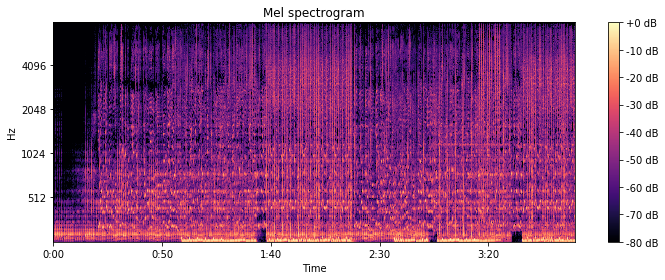

(512, 10336)

In [1266]:
S = librosa.feature.melspectrogram(y=y, n_mels=128*4, fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), 
                        y_axis='mel', fmax=8000, 
                        x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()
S.shape

In [1267]:
df = pd.DataFrame(S)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,10326,10327,10328,10329,10330,10331,10332,10333,10334,10335
count,512.0,512.0,512.0,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,...,512.000000,512.000000,512.000000,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000
mean,0.0,0.0,0.0,5.731374e-10,1.187879e-08,8.640484e-08,9.508608e-08,1.018729e-07,1.097003e-07,1.020178e-07,...,24.874960,23.413125,23.177146,23.767631,2.389636e+01,2.291123e+01,1.989983e+01,1.734382e+01,1.400702e+01,10.165167
std,0.0,0.0,0.0,1.637431e-09,5.560674e-08,7.610799e-07,8.225888e-07,8.763245e-07,9.275522e-07,8.585611e-07,...,215.127196,219.929500,227.842135,241.058617,2.424993e+02,2.260253e+02,1.904419e+02,1.466732e+02,9.683843e+01,49.041588
min,0.0,0.0,0.0,7.023050e-13,5.426182e-12,8.314520e-11,1.981482e-10,2.011452e-10,5.438845e-11,2.991620e-11,...,0.000027,0.000005,0.000004,0.000001,3.889960e-08,8.388704e-10,2.570897e-09,5.459030e-09,3.266723e-09,0.000049
25%,0.0,0.0,0.0,3.337097e-11,1.296695e-09,3.399353e-09,2.757780e-09,3.658241e-09,3.942938e-09,3.365776e-09,...,0.142539,0.062584,0.056825,0.059819,4.690733e-02,5.409010e-02,6.095002e-02,6.779797e-02,8.698849e-02,0.101207
50%,0.0,0.0,0.0,1.033330e-10,2.540729e-09,6.307475e-09,6.033008e-09,7.258958e-09,7.137352e-09,6.475326e-09,...,0.969104,0.363825,0.279929,0.220381,1.717822e-01,2.505925e-01,2.584743e-01,2.640948e-01,4.283445e-01,0.577244
75%,0.0,0.0,0.0,2.507070e-10,5.216816e-09,1.050611e-08,1.075873e-08,1.125187e-08,1.301644e-08,1.186718e-08,...,3.912053,2.085601,1.602188,1.060903,1.131641e+00,1.757617e+00,1.593941e+00,1.679300e+00,3.493377e+00,4.139251
max,0.0,0.0,0.0,1.350184e-08,9.848993e-07,1.402053e-05,1.005686e-05,1.174524e-05,1.182484e-05,1.110965e-05,...,4087.992316,4148.456086,4337.727661,4537.653192,4.586978e+03,4.246346e+03,3.602259e+03,2.725643e+03,1.777851e+03,723.271553


In [1268]:
librosa.output.write_wav(y=y, sr=sr, path='/Users/ilayda/Music/Audios/HIGH/wavfiles/'+songname+'.wav')